# Exploratory Data Analysis

### Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()

### Importing dataset 

In [2]:
#Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Data/selected_data.csv', index_col=0)
data.reset_index(inplace=True, drop=True)
data.head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,5,2,160.0,69.0,27.0,1.0,5,2,2.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1
1,6,2,165.0,54.0,20.0,3.0,5,3,3.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
2,3,2,168.0,91.0,32.0,1.0,5,3,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1
3,5,1,183.0,104.0,31.0,5.0,4,2,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.0,1
4,6,2,157.0,56.0,23.0,3.0,3,3,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1


### Basic exploration of dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414799 entries, 0 to 414798
Data columns (total 24 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Age Category                                  414799 non-null  int64  
 1   Sex                                           414799 non-null  int64  
 2   Height                                        414799 non-null  float64
 3   Weight                                        414799 non-null  float64
 4   BMI                                           414799 non-null  float64
 5   Marital Status                                414799 non-null  float64
 6   Income Category                               414799 non-null  int64  
 7   Education Level                               414799 non-null  int64  
 8   General Health                                414799 non-null  float64
 9   Physical Health                               41

The variable Coronary Heart Disease/Myocardial Infarction is renamed to CHD/MI for easier visualisation as it is our respondent variable.

In [5]:
data = data.rename(columns = {'Coronary Heart Disease/Myocardial Infarction':'CHD/MI'})

## Numerical Variables

### The numerical variables are:
Height, Weight, BMI, Physical Health,  Mental Health, Total Sleep

In [6]:
num_var = ['Height', 'Weight', 'BMI', 'Physical Health', 'Mental Health', 'Total Sleep']

num_data = pd.DataFrame(data[num_var])
num_data.head()

,Height,Weight,BMI,Physical Health,Mental Health,Total Sleep
0,160.0,69.0,27.0,0.0,0.0,6.0
1,165.0,54.0,20.0,0.0,1.0,9.0
2,168.0,91.0,32.0,0.0,0.0,8.0
3,183.0,104.0,31.0,0.0,0.0,7.0
4,157.0,56.0,23.0,0.0,0.0,7.0


In [7]:
num_data.describe()

,Height,Weight,BMI,Physical Health,Mental Health,Total Sleep
count,414799.000000,414799.000000,414799.000000,414799.000000,414799.000000,414799.000000
mean,170.208282,81.360416,27.955043,3.464365,3.503854,7.031584
std,10.596134,20.097845,6.060720,7.929494,7.663355,1.411449
min,91.000000,25.000000,12.000000,0.000000,0.000000,1.000000
25%,163.000000,68.000000,24.000000,0.000000,0.000000,6.000000
50%,170.000000,79.000000,27.000000,0.000000,0.000000,7.000000
75%,178.000000,91.000000,31.000000,2.000000,2.000000,8.000000
max,241.000000,294.000000,100.000000,30.000000,30.000000,24.000000


In [8]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414799 entries, 0 to 414798
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Height           414799 non-null  float64
 1   Weight           414799 non-null  float64
 2   BMI              414799 non-null  float64
 3   Physical Health  414799 non-null  float64
 4   Mental Health    414799 non-null  float64
 5   Total Sleep      414799 non-null  float64
dtypes: float64(6)
memory usage: 19.0 MB


Plot the boxplot, histogram, violin plot and pairplot for the numerical variables

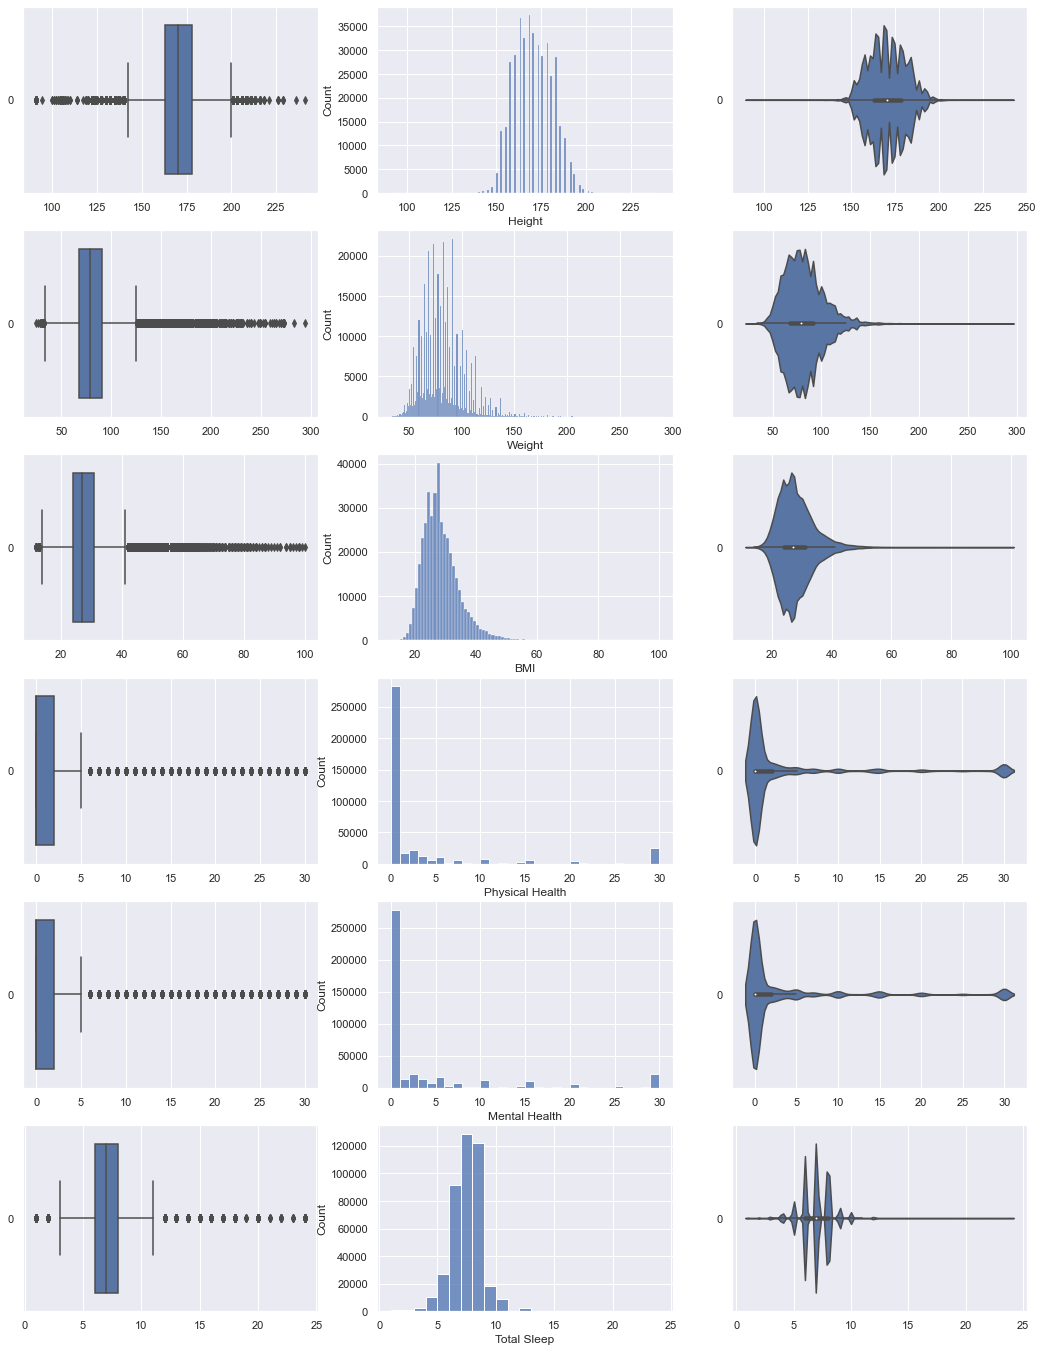

In [9]:
#Draw the distributions of all variables
f, axes = plt.subplots(6, 3, figsize=(18, 24))

axes[1][1].set_xlim([20, 300])

w = 1
count = 0
for var in num_data:
    sb.boxplot(data = num_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = num_data[var], ax = axes[count,1], bins=np.arange(num_data[var].min(), num_data[var].max() + w, w))
    sb.violinplot(data = num_data[var], orient = "h", ax = axes[count,2])
    count += 1

We want to observe the relationship between the variables and heart disease. Hence, Coronary Heart Disease/Myocardial Infarction is added to the dataset.

In [10]:
num_data = pd.concat([num_data, data['CHD/MI']], axis = 1)

Plot a heatmap to analyse the correlation for the numerical variables 

                   Height    Weight       BMI  Physical Health  Mental Health  \
Height           1.000000  0.503410 -0.007361        -0.053008      -0.058466   
Weight           0.503410  1.000000  0.850639         0.038420       0.020274   
BMI             -0.007361  0.850639  1.000000         0.076853       0.060317   
Physical Health -0.053008  0.038420  0.076853         1.000000       0.304690   
Mental Health   -0.058466  0.020274  0.060317         0.304690       1.000000   
Total Sleep     -0.006896 -0.051860 -0.054643        -0.070045      -0.124938   
CHD/MI           0.015946  0.028990  0.023890         0.151851       0.038969   

                 Total Sleep    CHD/MI  
Height             -0.006896  0.015946  
Weight             -0.051860  0.028990  
BMI                -0.054643  0.023890  
Physical Health    -0.070045  0.151851  
Mental Health      -0.124938  0.038969  
Total Sleep         1.000000  0.008580  
CHD/MI              0.008580  1.000000  


<AxesSubplot:>

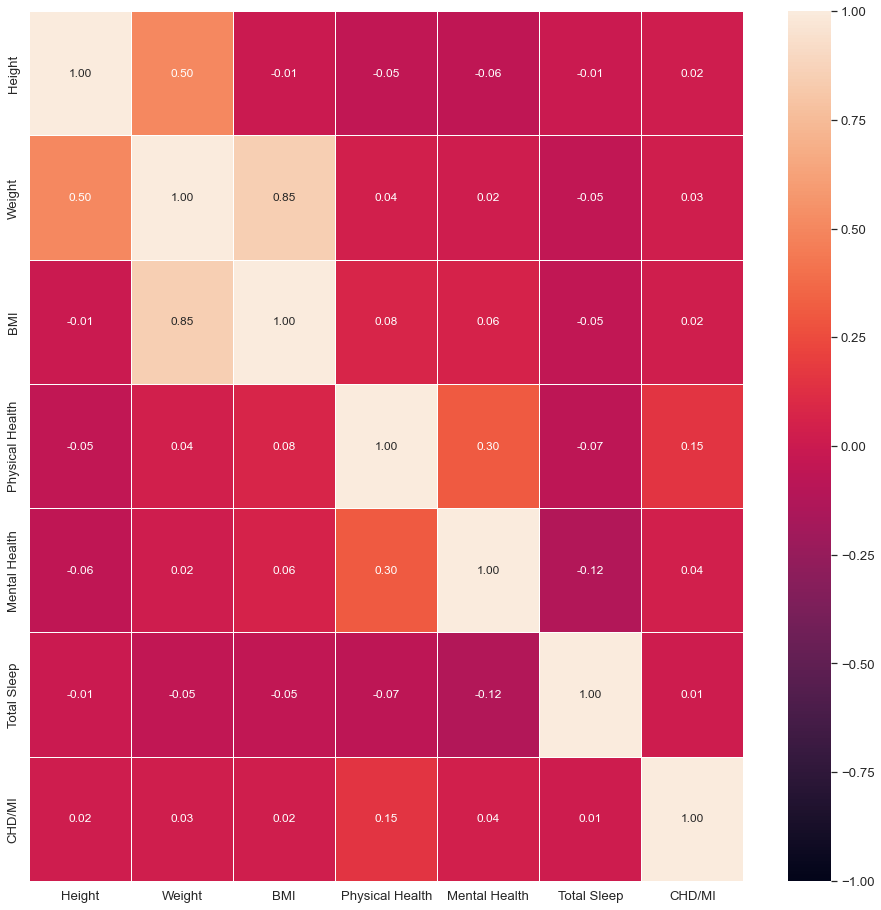

In [11]:
# Correlation Matrix
print(num_data.corr())

sns.set(font_scale=1.2)
# Plot the heatmap for the corr matrixb
f = plt.figure(figsize=(16, 16))
sb.heatmap(num_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 12})


We observe that there is hardly any correlation between CHD/MI and the numerical variables. However, they could have a non-linear relationship.

In [12]:
num_data.describe()

,Height,Weight,BMI,Physical Health,Mental Health,Total Sleep,CHD/MI
count,414799.000000,414799.000000,414799.000000,414799.000000,414799.000000,414799.000000,414799.000000
mean,170.208282,81.360416,27.955043,3.464365,3.503854,7.031584,0.072712
std,10.596134,20.097845,6.060720,7.929494,7.663355,1.411449,0.259664
min,91.000000,25.000000,12.000000,0.000000,0.000000,1.000000,0.000000
25%,163.000000,68.000000,24.000000,0.000000,0.000000,6.000000,0.000000
50%,170.000000,79.000000,27.000000,0.000000,0.000000,7.000000,0.000000
75%,178.000000,91.000000,31.000000,2.000000,2.000000,8.000000,0.000000
max,241.000000,294.000000,100.000000,30.000000,30.000000,24.000000,1.000000


Next, the numerical variables are plotted against CHD/MI to observe the distribution of values.

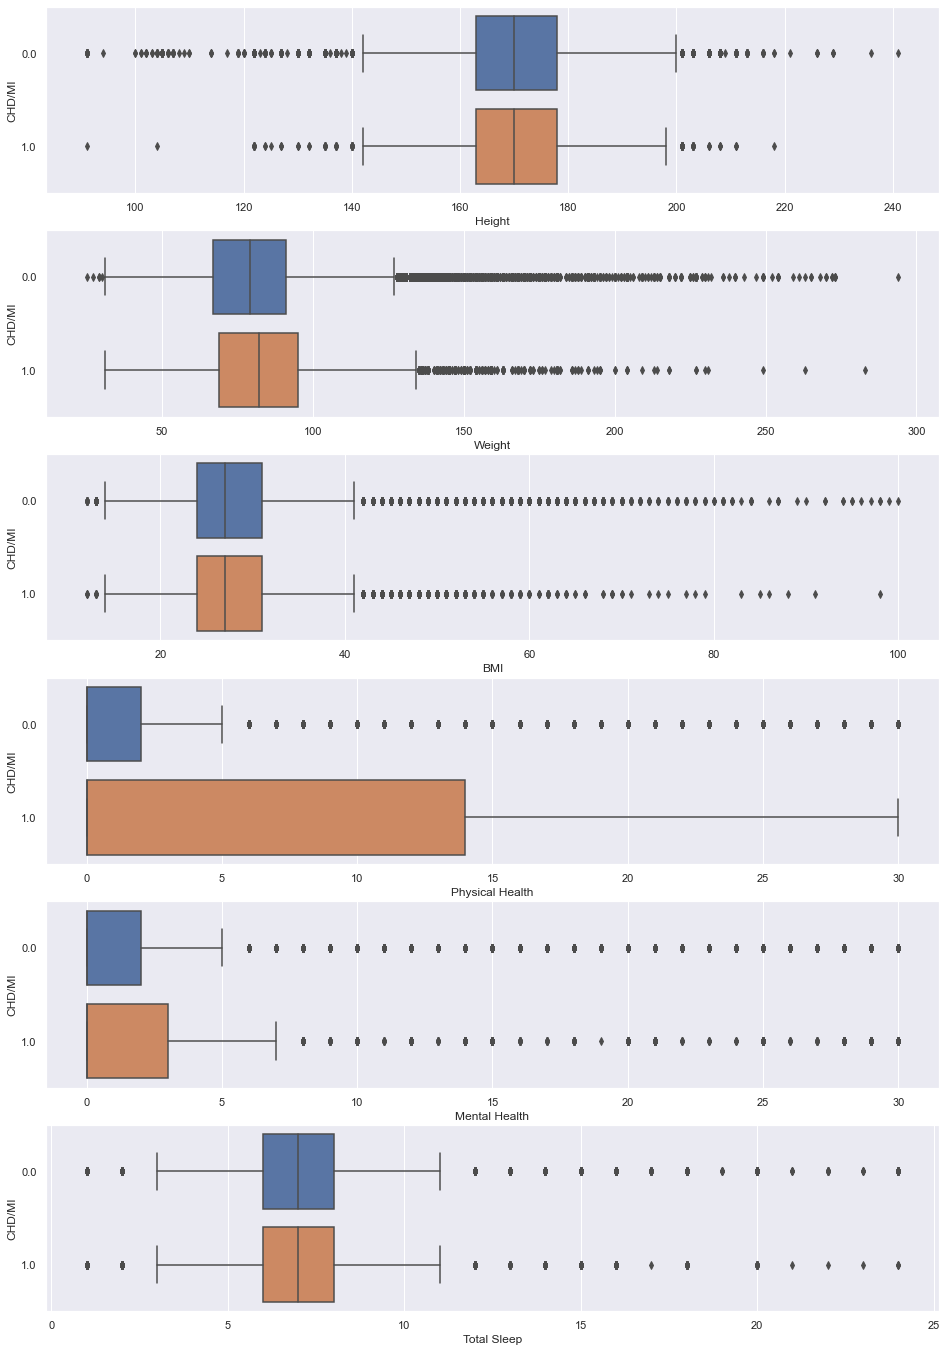

In [13]:
num_var = ['Height', 'Weight', 'BMI', 'Physical Health', 'Mental Health', 'Total Sleep']

sb.set(font_scale=1)
f, axes = plt.subplots(6,1,figsize=(16,24))
count = 0
for var in num_var:
    sb.boxplot(x = var, y = 'CHD/MI', data = data, orient = 'h', ax = axes[count])
    count += 1

It can be seen that most of the distributions are similar except physical health and weight. <br>
Physical Health here denotes the number of days of poor physical health the respondent experienced in the past 30 days and it shows that people who have more poor days might be more likely to have heart disease. <br>
There is a small difference in the distribution of Weight that indicates people with higher weight might be more likely to have heart disease.

## Categorical Variables

### The categorical variables are:
Age Category, Sex, Marital Status, Income Category, Education Level, General Health, Physical Health, Mental Health, Total Sleep, Smoker Status, Coronary Heart Disease/Myocardial Infarction, Stroke, Depressive Disorder, Kidney Disease, Cancer, Arthritis, Time since last routine checkup, Heavy Drinker, High blood sugar/Diabetes Test, Workout, Diabetes

In [14]:
#Drop the numerical variables to obtain the categorical data
num_var = ['Height', 'Weight', 'BMI', 'Physical Health', 'Mental Health', 'Total Sleep']

cat_data = data.drop(columns=num_var)
cat_data.head()

,Age Category,Sex,Marital Status,Income Category,Education Level,General Health,Smoker Status,CHD/MI,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,5,2,1.0,5,2,2.0,4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1
1,6,2,3.0,5,3,3.0,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1
2,3,2,1.0,5,3,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1
3,5,1,5.0,4,2,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.0,1
4,6,2,3.0,3,3,1.0,4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,0.0,1


In [15]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414799 entries, 0 to 414798
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age Category                     414799 non-null  int64  
 1   Sex                              414799 non-null  int64  
 2   Marital Status                   414799 non-null  float64
 3   Income Category                  414799 non-null  int64  
 4   Education Level                  414799 non-null  int64  
 5   General Health                   414799 non-null  float64
 6   Smoker Status                    414799 non-null  int64  
 7   CHD/MI                           414799 non-null  float64
 8   Stroke                           414799 non-null  float64
 9   Depressive Disorder              414799 non-null  float64
 10  Kidney Disease                   414799 non-null  float64
 11  Cancer                           414799 non-null  float64
 12  Ar

Convert the variables to categorical.

In [16]:
cat_data = cat_data.astype('category')
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414799 entries, 0 to 414798
Data columns (total 18 columns):
 #   Column                           Non-Null Count   Dtype   
---  ------                           --------------   -----   
 0   Age Category                     414799 non-null  category
 1   Sex                              414799 non-null  category
 2   Marital Status                   414799 non-null  category
 3   Income Category                  414799 non-null  category
 4   Education Level                  414799 non-null  category
 5   General Health                   414799 non-null  category
 6   Smoker Status                    414799 non-null  category
 7   CHD/MI                           414799 non-null  category
 8   Stroke                           414799 non-null  category
 9   Depressive Disorder              414799 non-null  category
 10  Kidney Disease                   414799 non-null  category
 11  Cancer                           414799 non-null  ca

In [17]:
cat_data.describe()

,Age Category,Sex,Marital Status,Income Category,Education Level,General Health,Smoker Status,CHD/MI,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
count,414799,414799,414799.0,414799,414799,414799.0,414799,414799.0,414799.0,414799.0,414799.0,414799.0,414799.0,414799.0,414799.0,414799,414799.0,414799
unique,6,4,6.0,5,4,5.0,4,2.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2,3.0,2
top,6,1,1.0,5,4,2.0,4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,0.0,1
freq,129877,190828,223288.0,216973,166734,150659.0,237610,384638.0,401350.0,342328.0,403550.0,378298.0,286705.0,317835.0,253131.0,324703,405175.0,384779


Plot the countplot for the categorical variables.

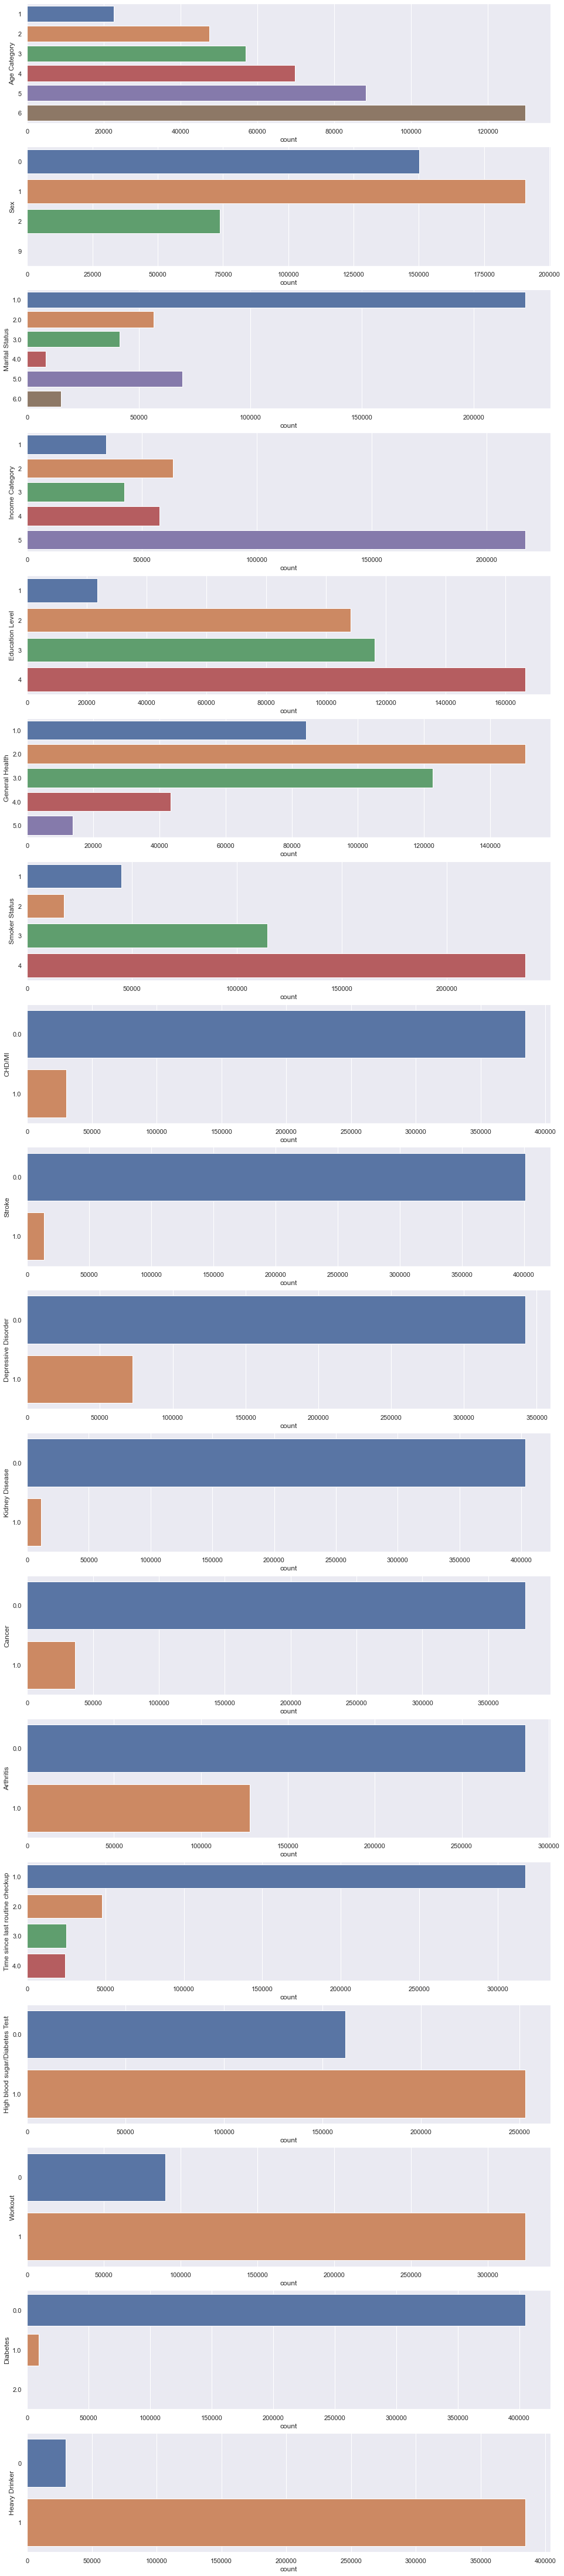

In [18]:
f, axes = plt.subplots(18, 1, figsize=(16,80))

sb.set(font_scale=1)
count = 0
for var in cat_data:
    sb.countplot(y = var, data = cat_data, ax = axes[count])
    count += 1

To check the effect of the categorical variables on CHD/MI. Stacked Bar Chart (SBC) is used because we considered that our dataset is very imbalanced. SBC can show the percentage of CHD/MI values at each category level which allows better comparison between the different levels.

<Figure size 2304x1008 with 0 Axes>

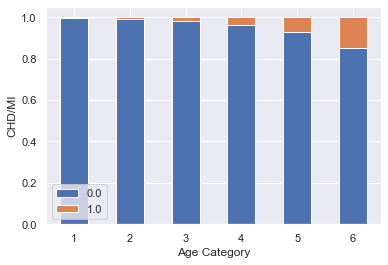

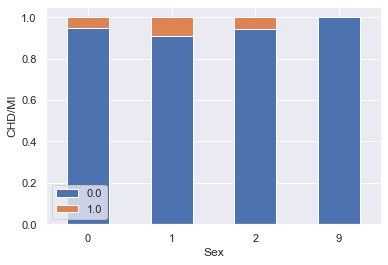

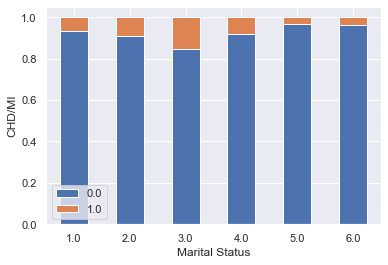

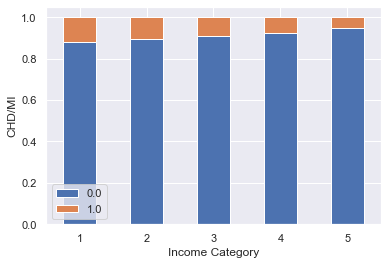

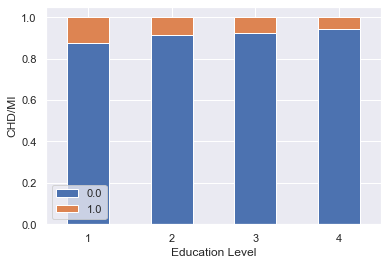

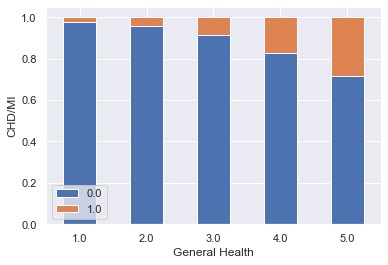

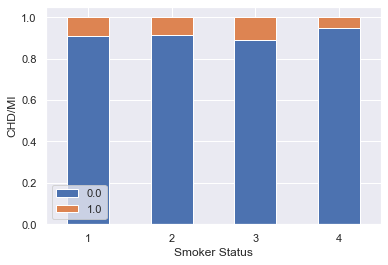

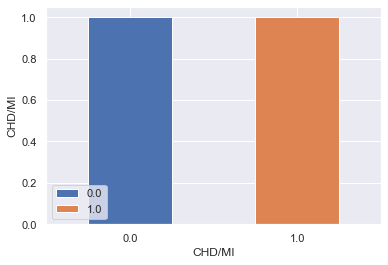

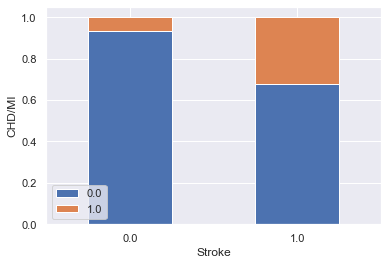

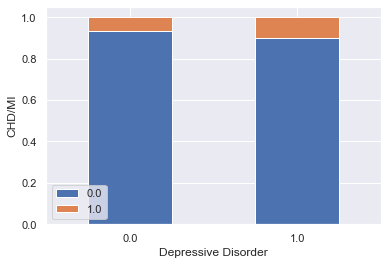

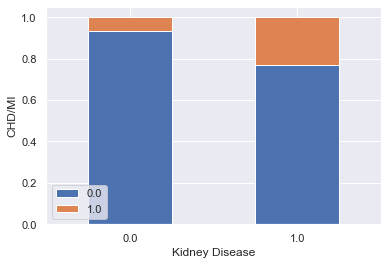

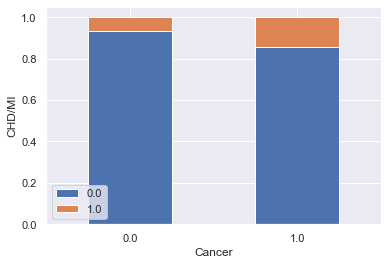

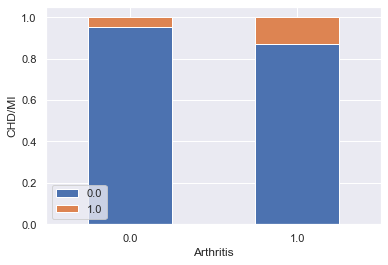

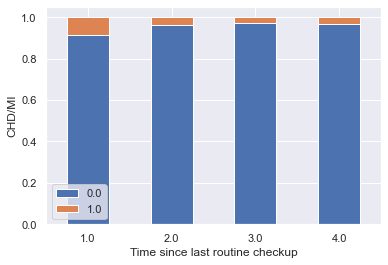

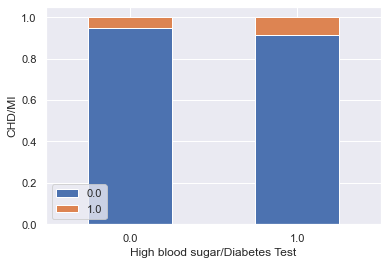

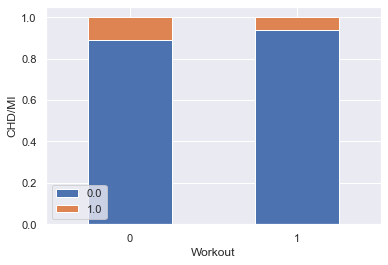

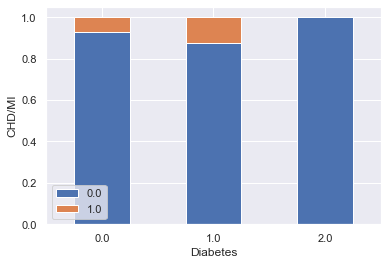

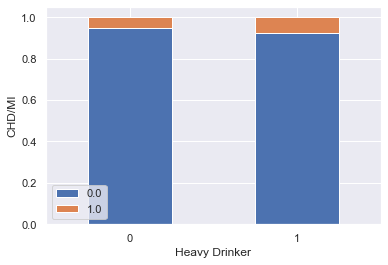

In [19]:
#Stacked Bar Chart
plt.figure(figsize=(32,14))
for var in cat_data:
    table=pd.crosstab(data[var],data['CHD/MI'])
    table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.xlabel(var)
    plt.ylabel('CHD/MI')
    plt.legend(loc=3)
    plt.xticks(rotation=0)

The observations are as follow:
- Age Category: The likelihood of having CHD/MI increases with age
- Sex: Men has a slightly higher percentage of having CHD/MI
- Marital Status: Widowed respondents are more likely to have CHD/MI compared to the other statuses
- Income Category: Decreasing trend of CHD/MI as income increases
- Education Level: Higher education levels show lower CHD/MI percentage
- General Health (Higher value indicates poorer health): The trend could be because of having CHD/MI affects the respondent's answer
- Smoker Status: Percentage of respondent who has CHD/MI is lower for the Never Smoked category
- Stroke: Respondent who has stroke are more likely to have CHD/MI
- Depressive Disorder: Respondent with depressive disorder has a higher percentage of CHD/MI
- Kidney Disease: The percentage of CHD/MI values of kidney disease patients are higher
- Cander: Cancer patients are more likely to have CHD/MI
- Arthritis: Having arthritis indicates a higher chance of the respondent having CHD/MI
- Time since last routine checkup: Results show that recent medical checkups might mean the respondent is more likely to have CHD/MI
- High blood sugar/Diabetes Test: Chart shows that test for high blood sugar or diabetes within past three years points to slightly higher percentage of having CHD/MI 
- Workout: People who workout have a lower chance of having CHD/MI
- Diabetes: Diabetes patients have a higher percentage of having CHD/MI
- Heavy Drinker: Heavy drinkers are slightly more likely to have CHD/MI


## Principal Component Analysis (PCA)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop target 
drop_list = [ 'CHD/MI']
features = list(data.drop(drop_list, axis=1).columns)

# Standardise the data 
x = data.loc[:, features].values
y = data.loc[:, ['CHD/MI']].values
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,0.440801,1.664789,-0.963398,-0.615013,-0.157579,-0.754987,0.808665,-1.090109,-0.390780,-0.436897,...,-0.183056,2.173397,-0.166958,-0.310624,-0.668416,-0.486564,-1.251298,0.526756,-0.154111,0.279318
1,1.079055,1.664789,-0.491527,-1.361362,-1.312559,0.450659,0.808665,-0.029370,0.582028,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,1.496075,-0.486564,0.799170,0.526756,-0.154111,0.279318
2,-0.835707,1.664789,-0.208405,0.479633,0.667406,-0.754987,0.808665,-0.029370,-0.390780,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,-0.668416,-0.486564,-1.251298,0.526756,-0.154111,0.279318
3,0.440801,0.259144,1.207208,1.126470,0.502409,1.656306,0.095588,-1.090109,-0.390780,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,-0.668416,-0.486564,0.799170,0.526756,-0.154111,0.279318
4,1.079055,1.664789,-1.246520,-1.261849,-0.817568,0.450659,-0.617489,-0.029370,-1.363588,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,1.496075,-0.486564,0.799170,0.526756,-0.154111,0.279318


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop target 
drop_list = ['CHD/MI']
features = list(data.drop(drop_list, axis=1).columns)

# Standardise the data 
x = data.loc[:, features].values
y = data.loc[:, ['CHD/MI']].values
x = StandardScaler().fit_transform(x)

pd.DataFrame(data = x, columns = features).head()

,Age Category,Sex,Height,Weight,BMI,Marital Status,Income Category,Education Level,General Health,Physical Health,...,Stroke,Depressive Disorder,Kidney Disease,Cancer,Arthritis,Time since last routine checkup,High blood sugar/Diabetes Test,Workout,Diabetes,Heavy Drinker
0,0.440801,1.664789,-0.963398,-0.615013,-0.157579,-0.754987,0.808665,-1.090109,-0.390780,-0.436897,...,-0.183056,2.173397,-0.166958,-0.310624,-0.668416,-0.486564,-1.251298,0.526756,-0.154111,0.279318
1,1.079055,1.664789,-0.491527,-1.361362,-1.312559,0.450659,0.808665,-0.029370,0.582028,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,1.496075,-0.486564,0.799170,0.526756,-0.154111,0.279318
2,-0.835707,1.664789,-0.208405,0.479633,0.667406,-0.754987,0.808665,-0.029370,-0.390780,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,-0.668416,-0.486564,-1.251298,0.526756,-0.154111,0.279318
3,0.440801,0.259144,1.207208,1.126470,0.502409,1.656306,0.095588,-1.090109,-0.390780,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,-0.668416,-0.486564,0.799170,0.526756,-0.154111,0.279318
4,1.079055,1.664789,-1.246520,-1.261849,-0.817568,0.450659,-0.617489,-0.029370,-1.363588,-0.436897,...,-0.183056,-0.460109,-0.166958,-0.310624,1.496075,-0.486564,0.799170,0.526756,-0.154111,0.279318


Principle Component Analysis (PCA)
Purpose of PCA: simplifies the complexity in high-dimensional data while retaining trends and patterns
Since PCA yields a feature subspace that maximizes the variance along the axes, 
it makes sense to standardize the data,  which is a requirement for the optimal performance of 
many machine learning algorithms.

In [22]:
# Importing key libraries for PCA 

from sklearn.decomposition import PCA

## Visualising result from PCA 

# Checking min no. of principal component to retain 90% of the variance 
pca = PCA(.90)   
pca.fit(x)
n = pca.n_components_

# PCA Projection to n dimension
pca_x = pca.fit_transform(x)
pca_names = ['PCA_{x}'.format(x=num) for num in range(1,n+1)]
pca_data = pd.DataFrame(data=pca_x, columns=pca_names)

f_data = pd.concat([pca_data, data['CHD/MI']], axis=1)

Total Explained Variance: 91.10%


<AxesSubplot:>

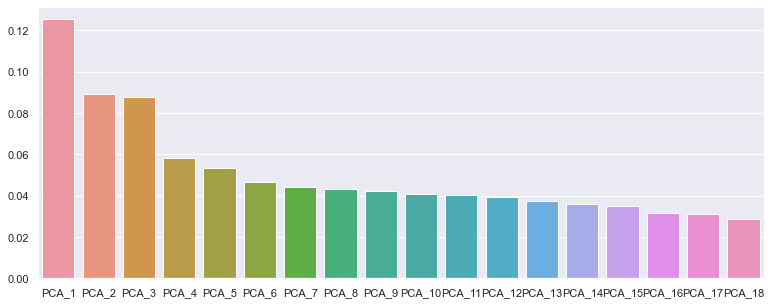

In [23]:
## Explained Variance plot for 90% explained variance
f, axes = plt.subplots(1,1, figsize = (13, 5))
total = pca.explained_variance_ratio_.sum()*100

print("Total Explained Variance: {:.2f}%".format(total))
sns.barplot(x=pca_names, y=pca.explained_variance_ratio_)

PCA Projection to 2D

In [24]:
pca = PCA(n_components=2)

In [25]:
principalComponents = pca.fit_transform(x)

In [26]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [27]:
finalDf = pd.concat([principalDf, data[['CHD/MI']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,CHD/MI
0,-0.486656,-0.642894,0.0
1,0.060042,-0.882257,1.0
2,-1.492606,0.742428,0.0
3,-0.521553,1.165855,0.0
4,-0.719730,-0.797067,0.0


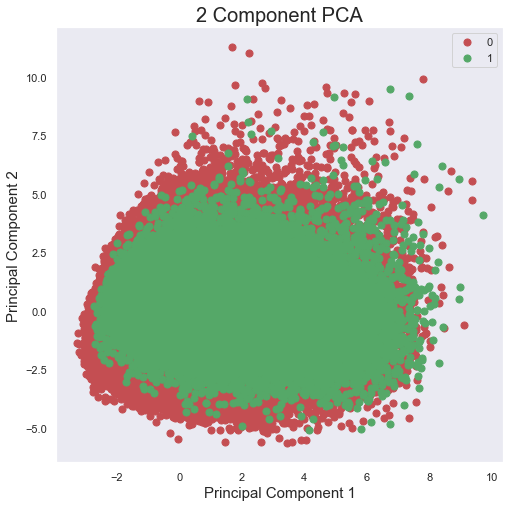

In [28]:
# Use a PCA projection to 2d to visualize the entire data set. 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['CHD/MI'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The explained variance tells us how much information (variance) can be attributed to each of the 
principal components.

In [29]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.12517324 0.08935042]
